<a href="https://colab.research.google.com/github/sw-song/FinanceDataReader/blob/master/fdr_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## test opensource - FinanceDataReader

In [1]:
pip install finance-datareader

### Step1. matplotlib 차트 설정


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [4]:
plt.style.use(['dark_background'])

### Step2. 라이브러리 호출

In [5]:
import FinanceDataReader as fdr

In [6]:
fdr.__version__

'0.9.10'

### Step3. 주가데이터 확인

In [7]:
nasdaq = fdr.StockListing('NASDAQ')

100%|██████████| 3165/3165 [00:47<00:00, 66.37it/s]


In [9]:
nasdaq.head()

,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,FB,Facebook Inc Class A,소프트웨어 및 IT서비스,572010
4,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010


In [30]:
googl = fdr.DataReader('GOOGL','2020-01-01')

In [31]:
googl.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-11-02,1624.32,1623.54,1658.24,1614.24,2210000.0,0.0051
2020-11-03,1645.66,1630.76,1659.00,1612.11,1570000.0,0.0131
2020-11-04,1745.85,1705.58,1770.03,1703.00,3570000.0,0.0609
2020-11-05,1762.50,1769.72,1791.66,1748.01,1990000.0,0.0095
2020-11-06,1759.73,1751.34,1768.49,1736.68,1430000.0,-0.0016


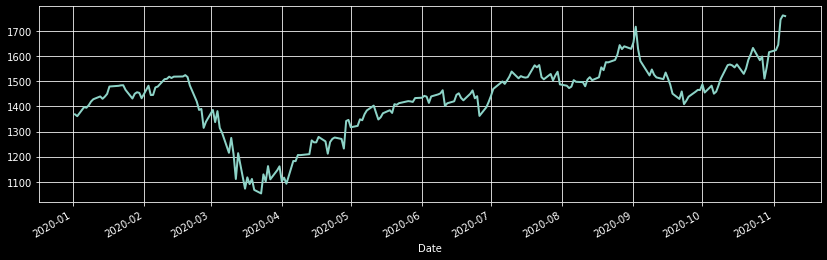

In [32]:
googl['Close'].plot()

In [33]:
aapl = fdr.DataReader('AAPL','2020')

In [34]:
aapl.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,75.09,74.06,75.15,73.80,135650000.0,0.0229
2020-01-03,74.36,74.29,75.14,74.12,146540000.0,-0.0097
2020-01-06,74.95,73.45,74.99,73.19,118580000.0,0.0079
2020-01-07,74.60,74.96,75.22,74.37,111510000.0,-0.0047
2020-01-08,75.80,74.29,76.11,74.29,132360000.0,0.0161


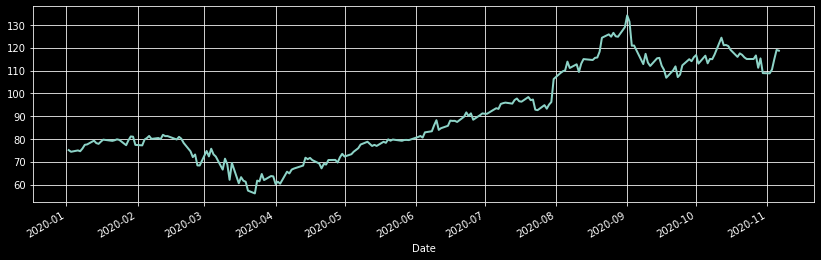

In [35]:
aapl['Close'].plot()

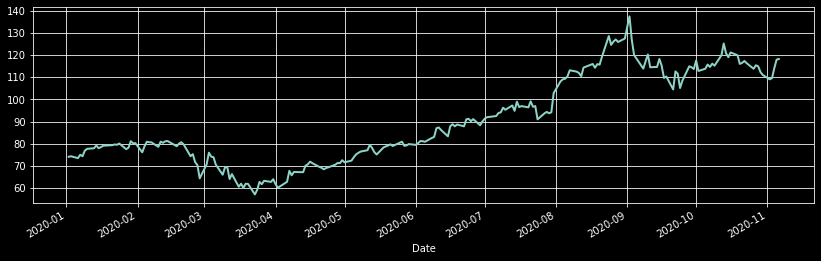

In [36]:
aapl['Open'].plot()

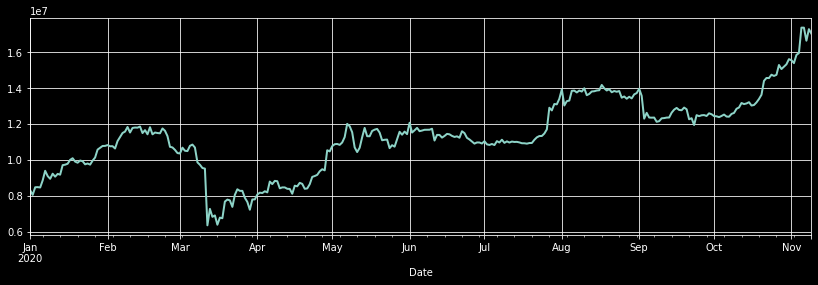

In [37]:
bitcoin = fdr.DataReader('BTC/KRW','2020')
bitcoin['Close'].plot()

### Step4. VIX 지수 확인

In [38]:
vix = fdr.DataReader('VIX', '2020')

In [39]:
vix.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,12.47,13.46,13.72,12.42,0.0,-0.0951
2020-01-03,14.02,15.01,16.20,13.13,0.0,0.1243
2020-01-06,13.85,15.45,16.39,13.54,0.0,-0.0121
2020-01-07,13.79,13.84,14.46,13.39,0.0,-0.0043
2020-01-08,13.45,15.16,15.24,12.83,0.0,-0.0247


In [40]:
vix.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-11-03,35.55,36.44,36.44,34.19,0.0,-0.0426
2020-11-04,29.57,36.79,36.85,28.03,0.0,-0.1682
2020-11-05,27.58,27.56,28.14,26.04,0.0,-0.0673
2020-11-06,24.86,27.87,29.44,24.56,0.0,-0.0986
2020-11-09,23.75,24.71,25.05,23.42,0.0,-0.0447


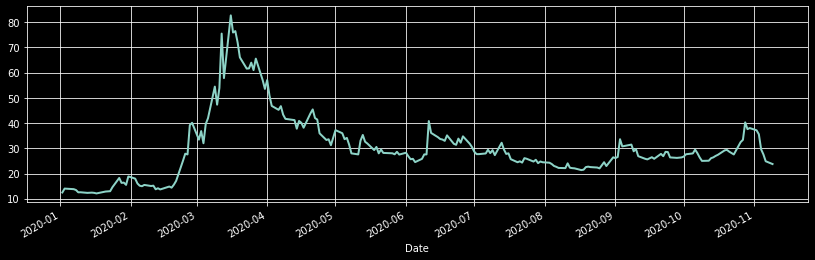

In [41]:
vix['Close'].plot()

In [42]:
sp500 = fdr.DataReader('US500','2020')

In [43]:
sp500.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-11-02,3310.24,3296.20,3330.14,3279.74,0.0,0.0123
2020-11-03,3369.16,3336.25,3389.49,3336.25,0.0,0.0178
2020-11-04,3443.44,3406.46,3486.25,3405.17,0.0,0.0220
2020-11-05,3510.45,3485.74,3529.05,3485.74,0.0,0.0195
2020-11-06,3509.44,3508.34,3521.58,3484.34,0.0,-0.0003


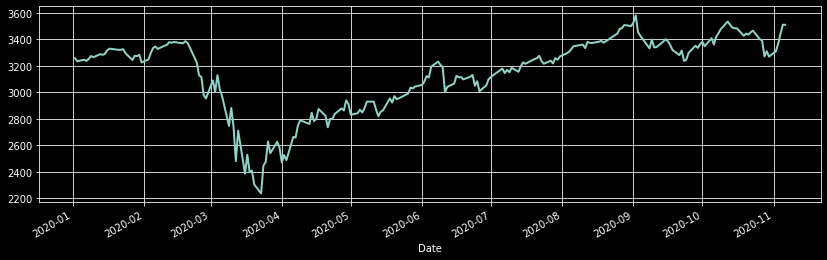

In [44]:
sp500['Close'].plot()

### Step5. Pandas 데이터 병합

In [45]:
import pandas as pd

In [56]:
sp500_vix=pd.concat([sp500['Close'],vix['Close']], axis=1)
sp500_vix.columns=['sp500','vix']

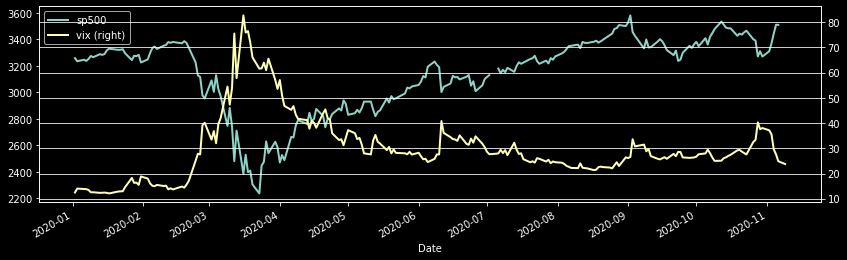

In [57]:
sp500_vix[['sp500','vix']].plot(secondary_y='vix')

### Step6. Kospi 병합

In [58]:
kospi = fdr.DataReader('KS11','2020')

In [59]:
sp_vix_kos = pd.concat([sp500['Close'],vix['Close'],kospi['Close']], axis=1)
sp_vix_kos.columns=['sp500','vix','kospi']

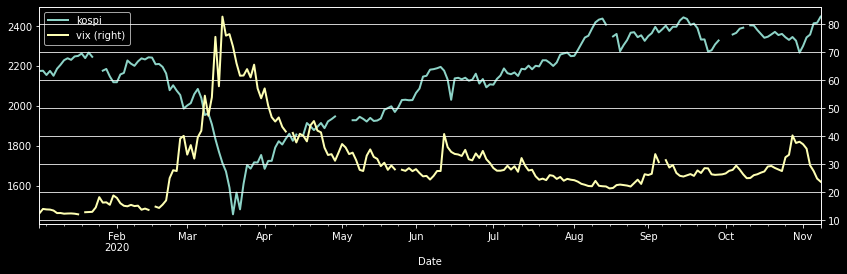

In [60]:
# kospi vs vix
sp_vix_kos[['kospi','vix']].plot(secondary_y='vix')

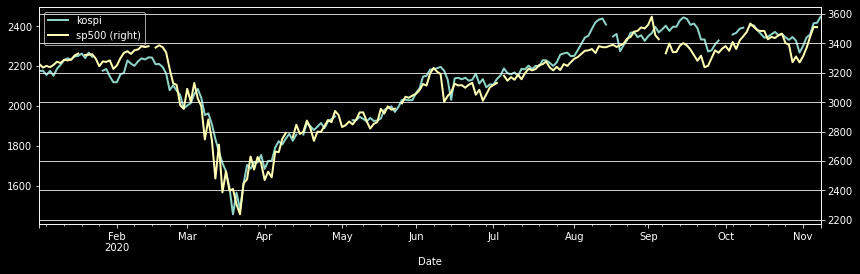

In [62]:
# kospi vs sp500
sp_vix_kos[['kospi','sp500']].plot(secondary_y='sp500')

### Step 7. 상관분석

In [63]:
sp_vix_kos.corr()

,sp500,vix,kospi
sp500,1.000000,-0.813761,0.962005
vix,-0.813761,1.000000,-0.725037
kospi,0.962005,-0.725037,1.000000


### Step 9. 히트맵

In [64]:
import seaborn as sns

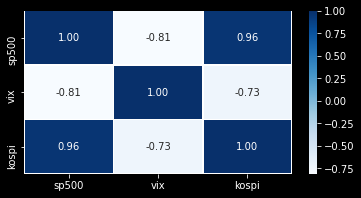

In [72]:
plt.figure(figsize=(6,3))
sns.heatmap(data=sp_vix_kos.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')